In [2]:
import matplotlib.pyplot as plt
import pandas as pd

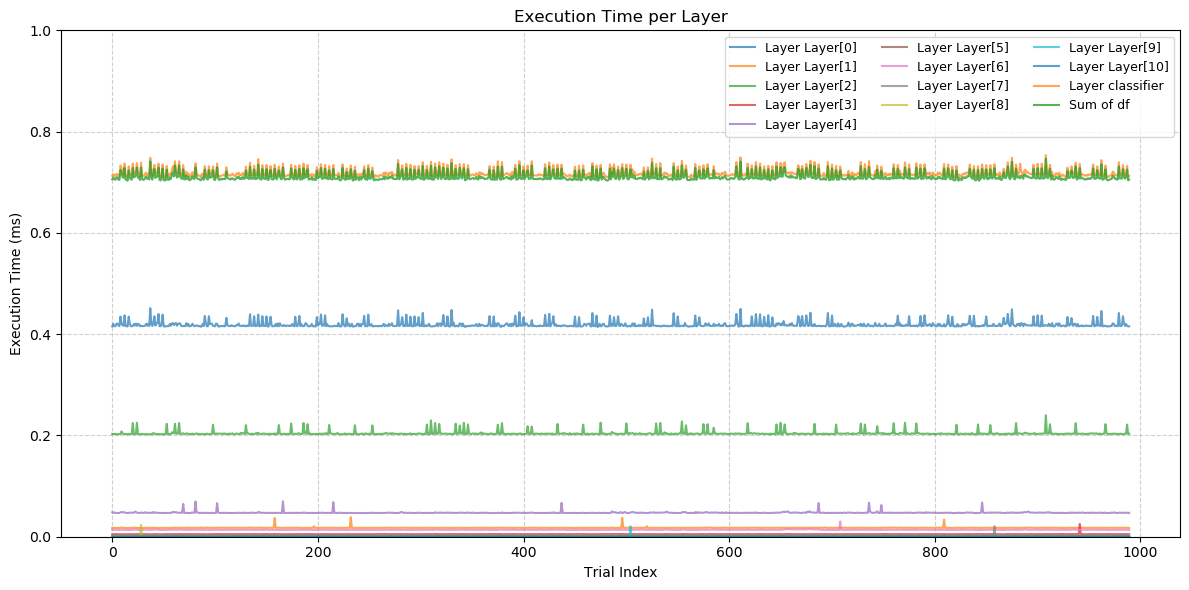

In [3]:
csv_path = "/home/avees/tee/output/e2e_execution_time/output_pp999-999_1013_1715.csv"
df = pd.read_csv(csv_path)
df = df.apply(pd.to_numeric, errors='coerce')
df = df.iloc[10:].reset_index(drop=True)
df = df.dropna(how='all')
df_sum = df.iloc[:, :-1].sum(axis=1)

# csv_path2 = "/home/avees/tee/output/output_pp999-999_1013_1346.csv"
# df2 = pd.read_csv(csv_path2)
# df2 = df2.apply(pd.to_numeric, errors='coerce')
# df2 = df2.iloc[10:].reset_index(drop=True)
# df2 = df2.dropna(how='all')

# 한 그래프에 여러 레이어 그리기
plt.figure(figsize=(12, 6))

for col in df.columns:
    plt.plot(df[col].values, marker='o', markersize=0, linestyle='-', alpha=0.7, label=f"Layer {col}")
# for col in df2.columns:
#     plt.plot(df2[col].values, marker='o', markersize=0, linestyle='-', alpha=0.7, label=f"Layer_{col}")
plt.plot(df_sum.values, marker='o', markersize=0, linestyle='-', alpha=0.8, label="Sum of df")

plt.title("Execution Time per Layer")
plt.xlabel("Trial Index")
plt.ylabel("Execution Time (ms)")
plt.ylim(0, 1)
plt.legend(ncol=3, fontsize=9)  # 범례를 여러 열로 배치
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

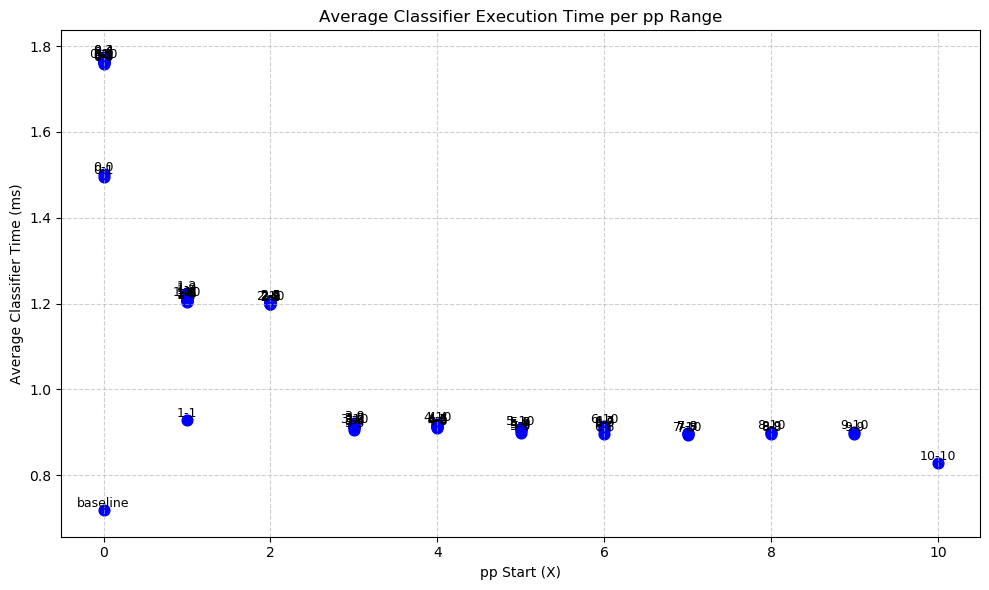

In [ ]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# CSV 폴더 경로
csv_dir = "/home/avees/tee/output/e2e_execution_time"

# 결과 저장용 리스트
labels = []
x_vals = []
y_vals = []

# 디렉토리 내 CSV 파일 순회
for filename in sorted(os.listdir(csv_dir)):
    if filename.endswith(".csv") and "output_pp" in filename:
        # 정규식으로 pp 뒤의 X-Y 추출
        match = re.search(r'pp(\d+)-(\d+)', filename)
        if not match:
            continue

        x_str, y_str = match.group(1), match.group(2)
        label_str = f"{x_str}-{y_str}"

        # 999-999 → baseline, x=0
        if label_str == "999-999":
            label_display = "baseline"
            x_val = 0
        else:
            label_display = label_str
            x_val = int(x_str)

        labels.append(label_display)
        x_vals.append(x_val)

        # CSV 읽기
        csv_path = os.path.join(csv_dir, filename)
        df = pd.read_csv(csv_path)

        # classifier 컬럼만 사용
        if "classifier" not in df.columns:
            continue
        classifier_data = pd.to_numeric(df["classifier"], errors="coerce")

        # 앞 5행 제거 후 평균 계산
        classifier_mean = classifier_data[5:].mean()
        y_vals.append(classifier_mean)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.scatter(x_vals, y_vals, color="blue", s=60)

# 각 점에 라벨 표시
for x, y, label in zip(x_vals, y_vals, labels):
    plt.text(x, y, label, fontsize=9, ha='center', va='bottom')

plt.title("Average Classifier Execution Time per pp Range")
plt.xlabel("pp Start (X)")
plt.ylabel("Average Classifier Time (ms)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


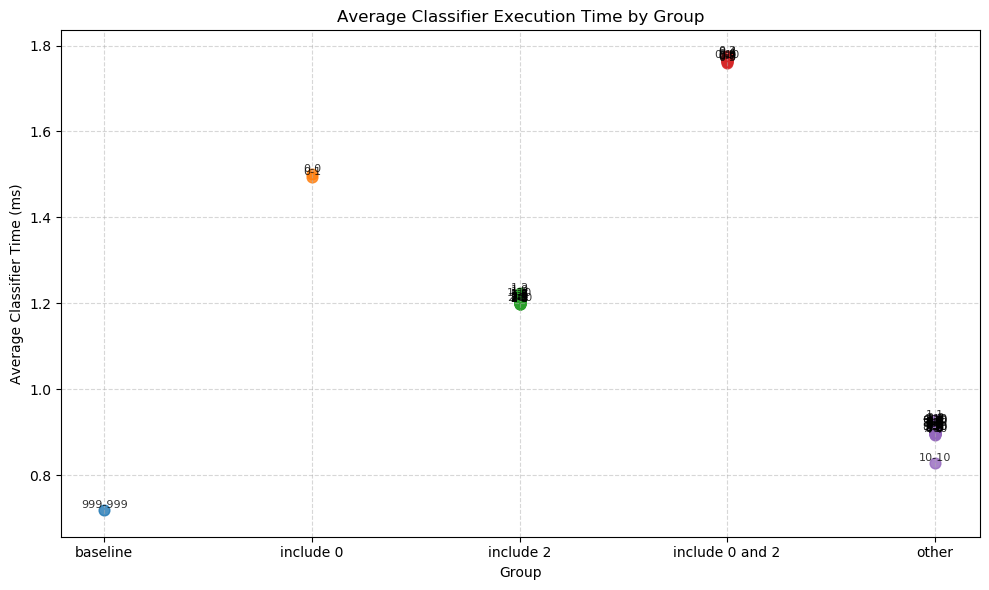

In [ ]:
# CSV 폴더 경로
csv_dir = "/home/avees/tee/output/e2e_execution_time"

# 결과 저장용 리스트
labels = []
x_groups = []
y_vals = []

# 디렉토리 내 CSV 파일 순회
for filename in sorted(os.listdir(csv_dir)):
    if filename.endswith(".csv") and "output_pp" in filename:
        # 정규식으로 pp 뒤의 X-Y 추출
        match = re.search(r'pp(\d+)-(\d+)', filename)
        if not match:
            continue

        start = int(match.group(1))
        end = int(match.group(2))
        label_str = f"{start}-{end}"

        # 그룹 분류
        if label_str == "999-999":
            group = "baseline"
        elif start <= 0 <= end and start <= 2 <= end:
            group = "include 0 and 2"
        elif start <= 0 <= end:
            group = "include 0"
        elif start <= 2 <= end:
            group = "include 2"
        else:
            group = "other"

        labels.append(label_str)
        x_groups.append(group)

        # CSV 읽기
        csv_path = os.path.join(csv_dir, filename)
        df = pd.read_csv(csv_path)

        # classifier 컬럼만 사용
        if "classifier" not in df.columns:
            continue
        classifier_data = pd.to_numeric(df["classifier"], errors="coerce")

        # 앞 5행 제거 후 평균 계산
        classifier_mean = classifier_data[5:].mean()
        y_vals.append(classifier_mean)

# DataFrame 생성
df_plot = pd.DataFrame({
    "label": labels,
    "group": x_groups,
    "mean": y_vals
})

# x축 순서 지정
group_order = ["baseline", "include 0", "include 2", "include 0 and 2", "other"]
df_plot["group"] = pd.Categorical(df_plot["group"], categories=group_order, ordered=True)
df_plot = df_plot.sort_values("group")

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 그룹별 점 표시
for group in group_order:
    subset = df_plot[df_plot["group"] == group]
    if not subset.empty:
        plt.scatter(
            [group] * len(subset),
            subset["mean"],
            label=group,
            s=60,
            alpha=0.8
        )

# 각 점에 라벨 표시
for x, y, label, group in zip(df_plot["group"], df_plot["mean"], df_plot["label"], df_plot["group"]):
    plt.text(x, y, label, fontsize=8, ha='center', va='bottom', alpha=0.8)

plt.title("Average Classifier Execution Time by Group")
plt.xlabel("Group")
plt.ylabel("Average Classifier Time (ms)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


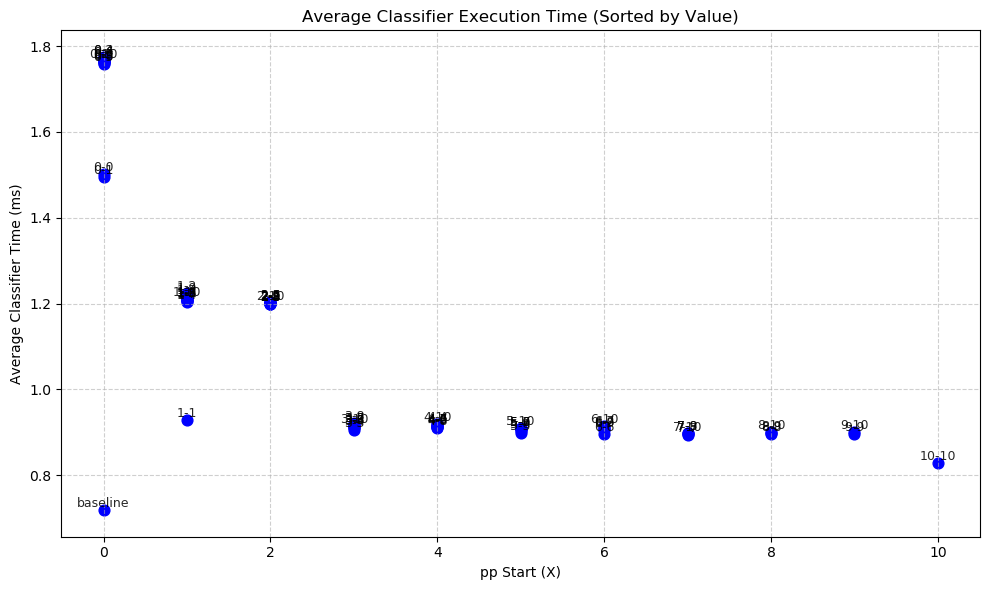

In [ ]:
# CSV 폴더 경로
csv_dir = "/home/avees/tee/output/e2e_execution_time"

# 결과 저장용 리스트
labels = []
x_vals = []
y_vals = []

# 디렉토리 내 CSV 파일 순회
for filename in sorted(os.listdir(csv_dir)):
    if filename.endswith(".csv") and "output_pp" in filename:
        match = re.search(r'pp(\d+)-(\d+)', filename)
        if not match:
            continue

        start = int(match.group(1))
        end = int(match.group(2))
        label_str = f"{start}-{end}"

        # baseline 처리
        if label_str == "999-999":
            label_display = "baseline"
            x_val = 0
        else:
            label_display = label_str
            x_val = start

        # CSV 읽기
        csv_path = os.path.join(csv_dir, filename)
        df = pd.read_csv(csv_path)

        # classifier 컬럼만 사용
        if "classifier" not in df.columns:
            continue
        classifier_data = pd.to_numeric(df["classifier"], errors="coerce")

        # 앞 5행 제거 후 평균 계산
        classifier_mean = classifier_data[5:].mean()

        # 리스트 저장
        labels.append(label_display)
        x_vals.append(x_val)
        y_vals.append(classifier_mean)

# DataFrame 생성 및 y값 기준 오름차순 정렬
df_plot = pd.DataFrame({"label": labels, "x": x_vals, "y": y_vals})
df_plot = df_plot.sort_values("y", ascending=True).reset_index(drop=True)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.scatter(df_plot["x"], df_plot["y"], color="blue", s=60)

# 각 점에 라벨 표시
for x, y, label in zip(df_plot["x"], df_plot["y"], df_plot["label"]):
    plt.text(x, y, label, fontsize=9, ha='center', va='bottom', alpha=0.85)

plt.title("Average Classifier Execution Time (Sorted by Value)")
plt.xlabel("pp Start (X)")
plt.ylabel("Average Classifier Time (ms)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


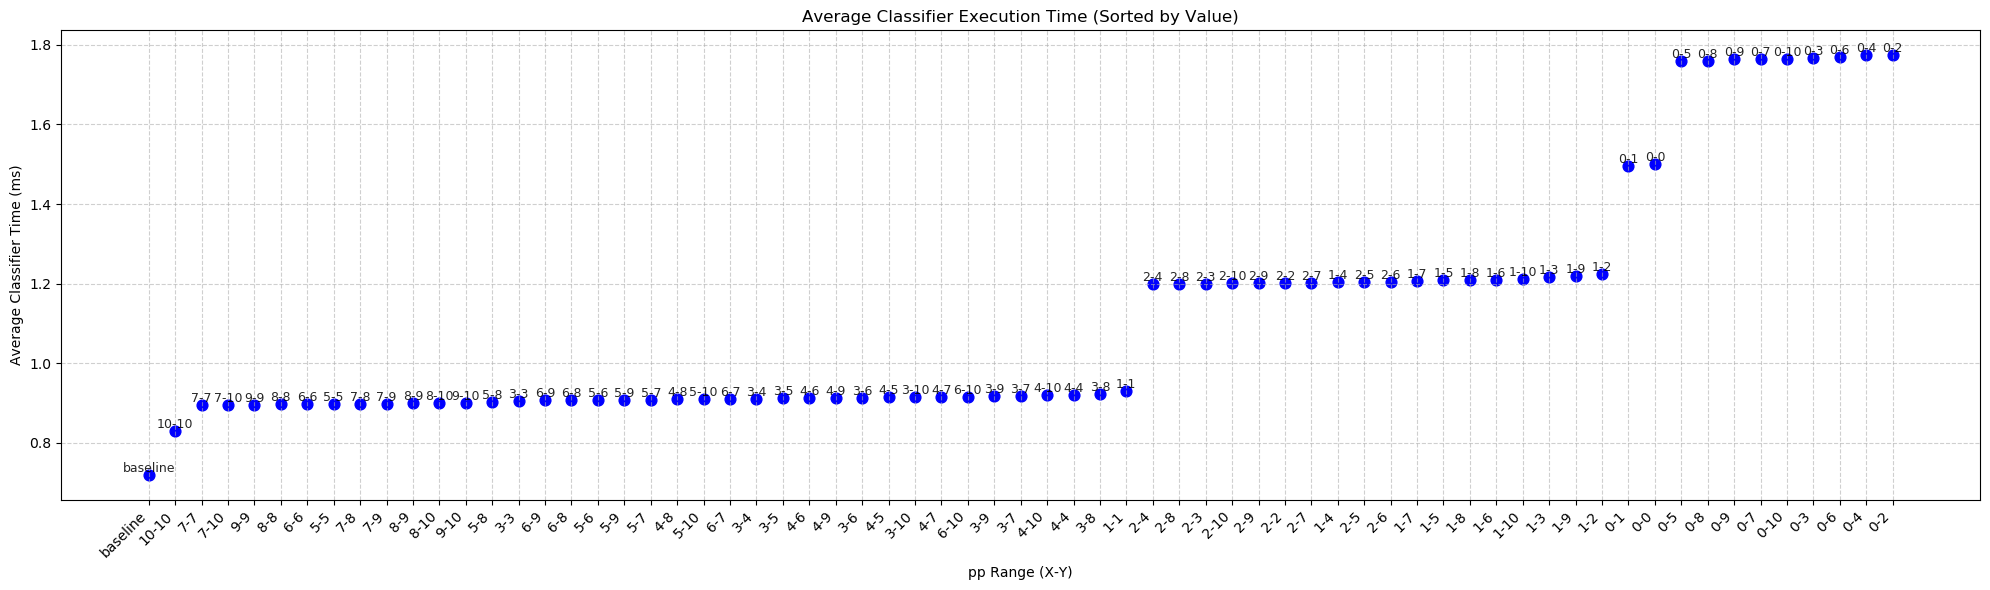

In [ ]:
# CSV 폴더 경로
csv_dir = "/home/avees/tee/output/e2e_execution_time"

labels = []
y_vals = []

# CSV 파일 순회
for filename in sorted(os.listdir(csv_dir)):
    if filename.endswith(".csv") and "output_pp" in filename:
        match = re.search(r'pp(\d+)-(\d+)', filename)
        if not match:
            continue

        x_str, y_str = match.group(1), match.group(2)
        label_str = f"{x_str}-{y_str}"

        # baseline 처리
        if label_str == "999-999":
            label_display = "baseline"
        else:
            label_display = label_str

        # CSV 읽기
        csv_path = os.path.join(csv_dir, filename)
        df = pd.read_csv(csv_path)

        if "classifier" not in df.columns:
            continue

        classifier_data = pd.to_numeric(df["classifier"], errors="coerce")
        classifier_mean = classifier_data[5:].mean()

        labels.append(label_display)
        y_vals.append(classifier_mean)

# DataFrame 생성 및 y값 기준 오름차순 정렬
df_plot = pd.DataFrame({"label": labels, "y": y_vals})
df_plot = df_plot.sort_values("y", ascending=True).reset_index(drop=True)

# 그래프 그리기
plt.figure(figsize=(20, 6))
plt.scatter(df_plot["label"], df_plot["y"], color="blue", s=60)

# 각 점에 라벨 표시 (중복 방지용 약간의 y offset)
for i, (x, y) in enumerate(zip(df_plot["label"], df_plot["y"])):
    plt.text(i, y, f"{x}", fontsize=9, ha='center', va='bottom', alpha=0.85)

plt.title("Average Classifier Execution Time (Sorted by Value)")
plt.xlabel("pp Range (X-Y)")
plt.ylabel("Average Classifier Time (ms)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
